In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import os
import tensorflow as tf
import pathlib
import cv2
import numpy as np
import glob

In [2]:
file = r"D:\Computer Vision\train\cat.0.jpg"
print(file)
print(os.path.dirname(file))

## we are using train data for cats and dogs as whole data.

D:\Computer Vision\train\cat.0.jpg
D:\Computer Vision\train


In [3]:
import random

# loop through all files, append, resize and normalize

filenames = []
labels = []
images = []

my_path = r"D:\Computer Vision\train"
files = glob.glob(my_path + '\**\*.jpg', recursive=True)
random.shuffle(files)

i = 0  # limiting array size to 10000, because i = i+1, assign 0 outside loop

#for file in files:
    #print(file)
    #i = i+1 
    #if i>10000:       # file has 25k images, we took 10000, comment out loop to take all 25k
        #break
   #folder = os.path.dirname(file)
    #if "cat" in file:
        #label = 0
    #else:
        #label = 1
    
    #image = cv2.imread(file)
    #print(image.shape)
    image = cv2.resize(image,(100,100)) # resizing to 100,100  because of out of memory error
    filenames.append(file)
    labels.append(label)
    images.append(image)
#for i in range(len(filenames)):
    #print(filenames[i], labels[i])
#print(image[0])
#print(images[0].shape) #print these to see what data looks like

images_arr = np.array(images)
images_arr = images_arr/255.0  # Normalising
# divide by 255.0 instead of 255 so that we get float
# check the commented out codes to view steps

## Now we have succesfully converted images to image-label pairs making it a data to work on.


In [4]:
images_arr

array([[[[0.63137255, 0.63529412, 0.62745098],
         [0.58431373, 0.58823529, 0.58039216],
         [0.56470588, 0.56862745, 0.56078431],
         ...,
         [0.05490196, 0.05882353, 0.05098039],
         [0.05098039, 0.05490196, 0.04705882],
         [0.04705882, 0.05098039, 0.04313725]],

        [[0.65098039, 0.65098039, 0.64313725],
         [0.62745098, 0.63137255, 0.62352941],
         [0.5372549 , 0.54117647, 0.53333333],
         ...,
         [0.05490196, 0.05882353, 0.04705882],
         [0.05882353, 0.0627451 , 0.05490196],
         [0.05098039, 0.05490196, 0.04705882]],

        [[0.66666667, 0.67058824, 0.6627451 ],
         [0.65882353, 0.6627451 , 0.65490196],
         [0.52941176, 0.53333333, 0.5254902 ],
         ...,
         [0.0745098 , 0.07843137, 0.07058824],
         [0.06666667, 0.07058824, 0.0627451 ],
         [0.0627451 , 0.06666667, 0.05882353]],

        ...,

        [[0.39215686, 0.43137255, 0.43137255],
         [0.40784314, 0.44705882, 0.44705882]

In [5]:
print(images_arr.shape)
print(images_arr.dtype)

(10000, 100, 100, 3)
float64


In [6]:
# Now the data has undergone preprocessing, we move on to model building
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras import backend as K

## STEP 2 - MODEL DEFINING

In [7]:
input_shape = (100,100,3)

model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

## STEP 3 - MODEL COMPILING

In [8]:
# compile
model.compile(loss='sparse_categorical_crossentropy',  # categorical for multiclass, sparse categorical for distinct classes
                                                       # binary for binary categorical variable
              optimizer='adam',              # ADAM optimizer is a dynamic opt
              metrics=['accuracy'])

## STEP 4 - MODEL FIT

In [9]:
# Introducing data to the network

labels = np.array(labels)

history = model.fit(images_arr, labels, batch_size=128, epochs=25)
# Try for a batch size of 128 next
## 79 here is steps per epoch

Epoch 1/25
79/79 [==============================] - 211s 3s/step - loss: 0.8668 - accuracy: 0.6387
Epoch 2/25
79/79 [==============================] - 208s 3s/step - loss: 0.5896 - accuracy: 0.7202
Epoch 3/25
79/79 [==============================] - 207s 3s/step - loss: 0.5141 - accuracy: 0.7518
Epoch 4/25
79/79 [==============================] - 208s 3s/step - loss: 0.4508 - accuracy: 0.7931
Epoch 5/25
79/79 [==============================] - 2192s 22s/step - loss: 0.4194 - accuracy: 0.8106
Epoch 6/25
79/79 [==============================] - 206s 3s/step - loss: 0.3890 - accuracy: 0.8267
Epoch 7/25
79/79 [==============================] - 207s 3s/step - loss: 0.3694 - accuracy: 0.8344
Epoch 8/25
79/79 [==============================] - 207s 3s/step - loss: 0.3354 - accuracy: 0.8530
Epoch 9/25
79/79 [==============================] - 207s 3s/step - loss: 0.2955 - accuracy: 0.8757
Epoch 10/25
79/79 [==============================] - 208s 3s/step - loss: 0.2660 - accuracy: 0.8891
Epoch 1

## SAVE MODEL

In [10]:
model.save("D:\Computer Vision\model2_pets.h5")
# save model after running epochs to avoid warning

HDFS file viewer to see weights and biases of your model

## View training testing graphs

25
{'loss': [0.86678147315979, 0.5896478891372681, 0.5141427516937256, 0.4507857859134674, 0.4193933606147766, 0.3889501094818115, 0.3694399297237396, 0.33539873361587524, 0.2955484986305237, 0.266001433134079, 0.25398480892181396, 0.22555725276470184, 0.2171451598405838, 0.17522607743740082, 0.16193123161792755, 0.12764029204845428, 0.11644584685564041, 0.11304924637079239, 0.12474251538515091, 0.1022375300526619, 0.0917983129620552, 0.09427399188280106, 0.10551244020462036, 0.07676901668310165, 0.061732806265354156], 'accuracy': [0.638700008392334, 0.7202000021934509, 0.751800000667572, 0.7930999994277954, 0.8105999827384949, 0.82669997215271, 0.8343999981880188, 0.8529999852180481, 0.8756999969482422, 0.8891000151634216, 0.8920000195503235, 0.9079999923706055, 0.9143999814987183, 0.9297000169754028, 0.935699999332428, 0.9495999813079834, 0.9545999765396118, 0.9574000239372253, 0.9546999931335449, 0.9613999724388123, 0.9657999873161316, 0.9642000198364258, 0.9593999981880188, 0.97310

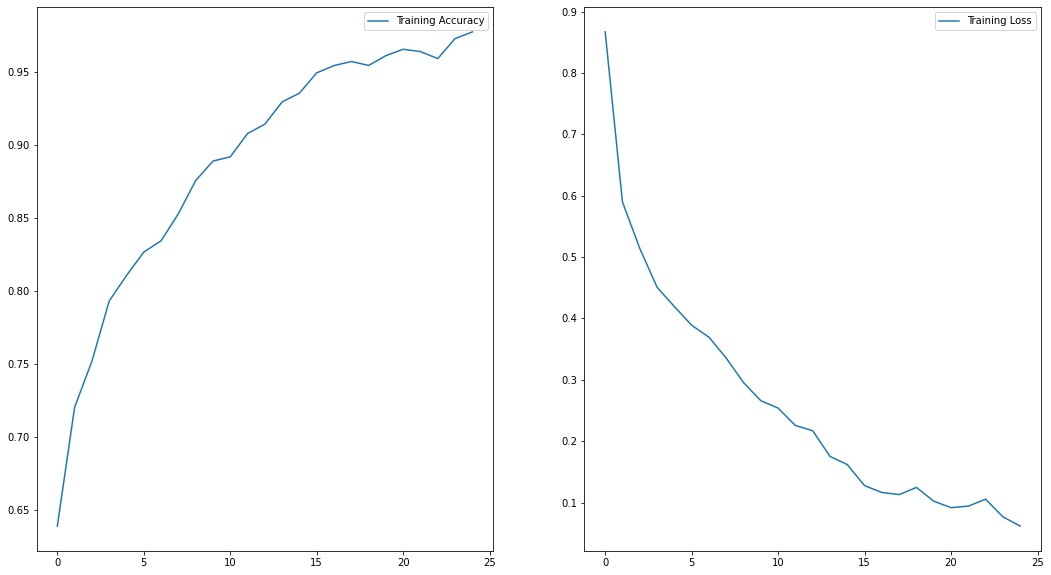

In [14]:
epochs=25
acc = history.history['accuracy']
print(len(acc))
print(history.history)
#val_acc = history.history['val_accuracy']

loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(18, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
#plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
#plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
#plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
#plt.title('Training and Validation loss')

## TESTING

In [15]:
from tensorflow.keras.models import load_model

In [16]:
model = load_model(r'D:\Computer Vision\model2_pets.h5')
model

In [17]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 98, 98, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 47, 47, 64)       2

Make a folder of random pics as test set

In [18]:
test = r"D:\Computer Vision\pet.test"
files = glob.glob(test + '\**\*.jpg', recursive=True)

test_arr = []
test_labels = []
images = []

for file in files:
    print(file)
    image = cv2.imread(file)
    image = cv2.resize(image,(100,100)) # resizing
    images.append(image)

test_arr = np.array(images)
test_arr = test_arr/255.0 
print(test_arr.shape)

(0,)


In [36]:
y_pred = model.predict(test_arr) # contains 2 cols for 2 categories [0]cats and [1]dogs
print(y_pred)
# first val in rows is greater in col1, so cat

[[9.9961227e-01 3.8769966e-04]
 [8.7225837e-01 1.2774165e-01]
 [9.2233580e-01 7.7664182e-02]
 [9.5404518e-01 4.5954879e-02]
 [9.9537778e-01 4.6221805e-03]]


In [44]:
y_actual_cat = [1,1,1,0,0] # here 1 and 0 are probability vals
# prob of pic being cat is 1, given manually from test folder, 1st 3 pics are cats
#y_pred_cat = y_pred[0]  # here 0 is cat, for dog it is 1
y_pred_cat = y_pred[:,0]  # 1st row [r:c,0] all rows and cols, only : means all rows and cols, after giving ,0, we see 1st row
print(y_pred)
print(y_pred_cat)

[[9.9961227e-01 3.8769966e-04]
 [8.7225837e-01 1.2774165e-01]
 [9.2233580e-01 7.7664182e-02]
 [9.5404518e-01 4.5954879e-02]
 [9.9537778e-01 4.6221805e-03]]
[0.9996123  0.87225837 0.9223358  0.9540452  0.9953778 ]


In [45]:
y_actual_cat = np.array(y_actual_cat)

In [46]:
print(y_actual_cat.shape)
print(y_pred_cat.shape)

(5,)
(5,)


In [47]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [48]:
fpr, tpr, _ = roc_curve(y_actual_cat, y_pred_cat)
...
# calculate AUC (area under curve)
auc = roc_auc_score(y_actual_cat, y_pred_cat)
print('AUC: %.3f' % auc)

AUC: 0.333


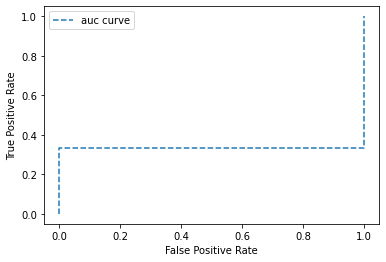

In [49]:
pyplot.plot(fpr, tpr, linestyle='--', label='auc curve')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## plotting for only cats. In binary, it's enough to plot for just one class to indicate how other class is working
## for multiclass, plot all separately.

In [ ]:
## HW
TRY FOR ALL PICS
TRY FOR MORE EPOCHS AND HIGHER BATCHES
SHOW ROC CURVE FOR TEST.ZIP FROM LINK
## NEXT CLASS
CALL BACK - DEFINE TOLERANCE